# End to End Machine Learning Project on Student Outcomes

Problem Statement
- We will explore how a student's performance is affected by attributes like gender, race, parents' level of education, lunch type, and test preparation course.

### Setup

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [50]:
print('EDA')

EDA


### Load Data

Data found at https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [51]:
students = pd.read_csv('data/StudentsPerformance.csv')

In [52]:
students.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


Data Information
- gender
- race_ethnicity
- parental_level_of_education
- lunch:
- test_prep
- math_score
- reading_score
- writing_score

In [53]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Preprocessing

In this section, we will preprocess the data by performing the following:
- Check for nulls
- Check for duplicates
- Check for uniqueness
  - Counts of categories
- Check and fix any data types
- Descriptice statistics
- 

### Checking for Nulls

In [54]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values.

### Check for Duplicates

In [55]:
students.duplicated().sum()

0

### Check for uniqueness

In [56]:
students.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Counts of categories

In [57]:
# students['gender'].unique()

In [58]:
# iterate over categorical features
count = 0
for columnName, columnData in students.items():
    if count<5:
        print(students[columnName].value_counts(), '\n')
    count+=1

gender
female    518
male      482
Name: count, dtype: int64 

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

test preparation course
none         642
completed    358
Name: count, dtype: int64 



These are the categories and their counts for each of the categorical features.

### Check and fix any data types

In [59]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [60]:
students.rename(columns={
    'race/ethnicity':'race_ethnicity',
    'parental level of education':'parental_education',
    'test preparation course':'test_prep_course',
    'math score':'math_score',
    'reading score':'reading_score',
    'writing score':'writing_score'
}, inplace=True)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race_ethnicity      1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_prep_course    1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Descriptice Statistics

In [61]:
students.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


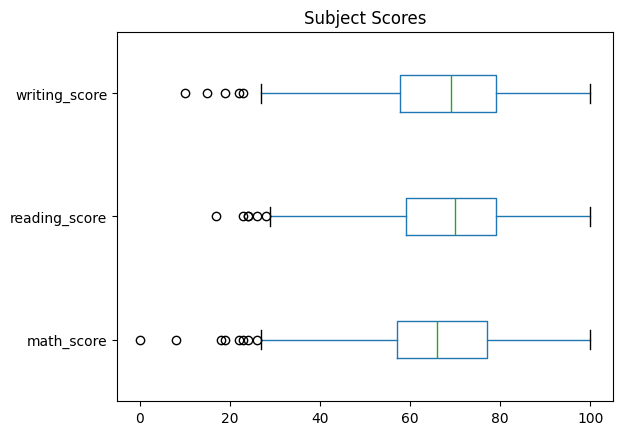

In [62]:
scores = students.iloc[:, 5:]
# scores.head()
scores.boxplot(vert=False, grid=False) #, by='gender')
plt.title('Subject Scores')
plt.show()

#### Findings
- The means are within 3 points for each other, ranging from 66 to 69. 
- The standard deviation is around 15 points for all subjets.
- The IQR ranges for all subjects are about 20 points large, ranging from 57 to 79.
- Math tended to have the lowest values among the different statistics, ie lowest minimum, mean, IQR values, of all the subjects.

In [63]:
# define numerical and categorical columns
# print(students['math score'].dtype)
students['gender'].dtype

dtype('O')

In [64]:
# quantitative features
numeric_features = [feature for feature in students.columns if students[feature].dtype != 'O']
print('The {} numerical features : {}'.format(len(numeric_features), numeric_features))

# categorical_features
categorical_features = [feature for feature in students.columns if students[feature].dtype == 'O']
print('\nThe {} categorical features : {}'.format(len(categorical_features), categorical_features))

The 3 numerical features : ['math_score', 'reading_score', 'writing_score']

The 5 categorical features : ['gender', 'race_ethnicity', 'parental_education', 'lunch', 'test_prep_course']


### Feature Engineering
Total Score and Average Columns

In [65]:
students['total_score'] = scores.sum(axis=1)
students.head()

,gender,race_ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [66]:
students['average'] = students['total_score']/3
students.head()

,gender,race_ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Full Marks Across All Subjects

In [67]:
students[students['average']==100]

,gender,race_ethnicity,parental_education,lunch,test_prep_course,math_score,reading_score,writing_score,total_score,average
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


In [68]:
subjects = {
    "Math": "math_score",
    "Reading": "reading_score",
    "Writing": "writing_score"
}
for i in subjects:
    print(f'Number of students with full marks in {i} : ', students[students[subjects[i]]==100]['average'].count())

Number of students with full marks in Math :  7
Number of students with full marks in Reading :  17
Number of students with full marks in Writing :  14


In [69]:
for i in subjects:
    print(f'Number of students with less than 20 marks in {i} : ', students[students[subjects[i]]<=20]['average'].count())

Number of students with less than 20 marks in Math :  4
Number of students with less than 20 marks in Reading :  1
Number of students with less than 20 marks in Writing :  3


The above shows that students had more trouble in Math with the fewest full marks and the most students with less than 20 marks. On the other hand, Reading performed the best with the most students with full marks and the least amount of students with less than 20 marks. This also supports the descriptive statitstics done earlier and the boxplot. 

## Data Visualization

Histograms

Kernel Density Estimation 

### Average Scores

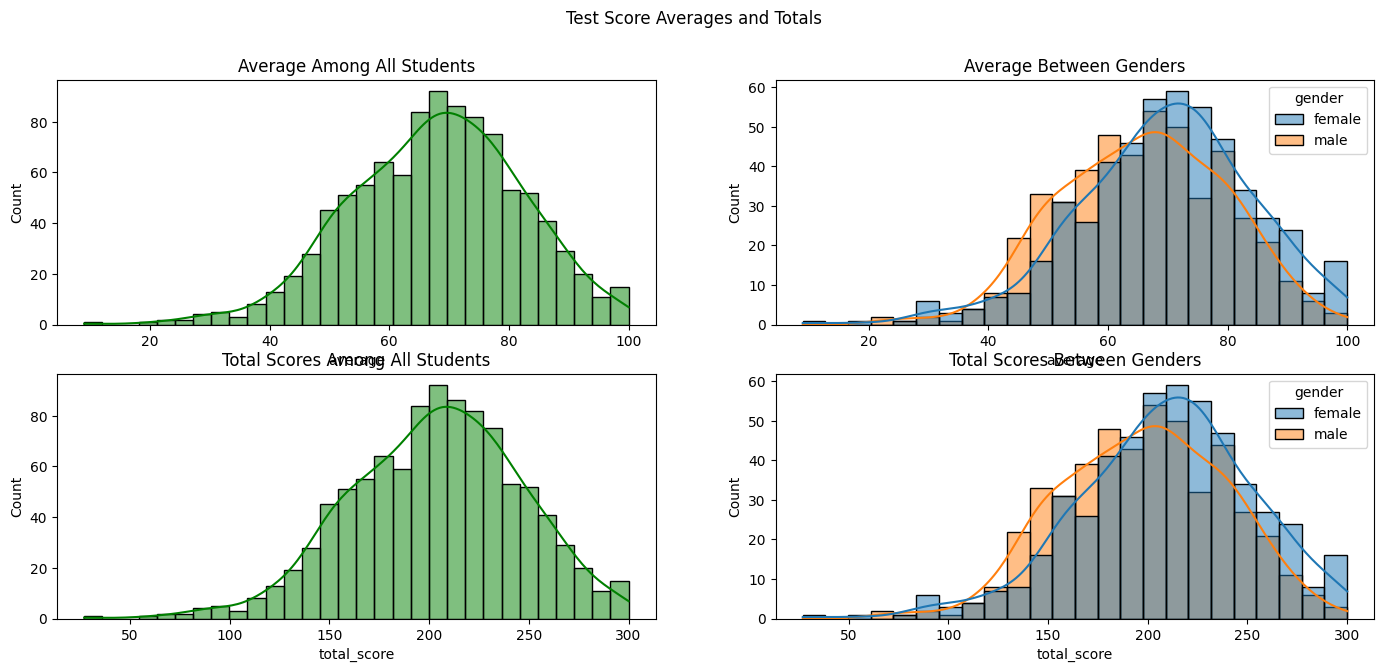

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(17,7))
plt.subplot(221)
sns.histplot(data=students, x='average', bins=30, kde=True, color='g')
plt.title('Average Among All Students')
plt.subplot(222)
sns.histplot(data=students, x='average', kde=True, hue='gender')
plt.title('Average Between Genders')

plt.subplot(223)
sns.histplot(data=students, x='total_score', bins=30, kde=True, color='g')
plt.title('Total Scores Among All Students')
plt.subplot(224)
sns.histplot(data=students, x='total_score', kde=True, hue='gender')
plt.title('Total Scores Between Genders')

plt.suptitle('Test Score Averages and Totals')
plt.show()

We see the averages are left-tailed in the distribution.

When comparing the genders, the females score higher.

### Lunch Comparisons

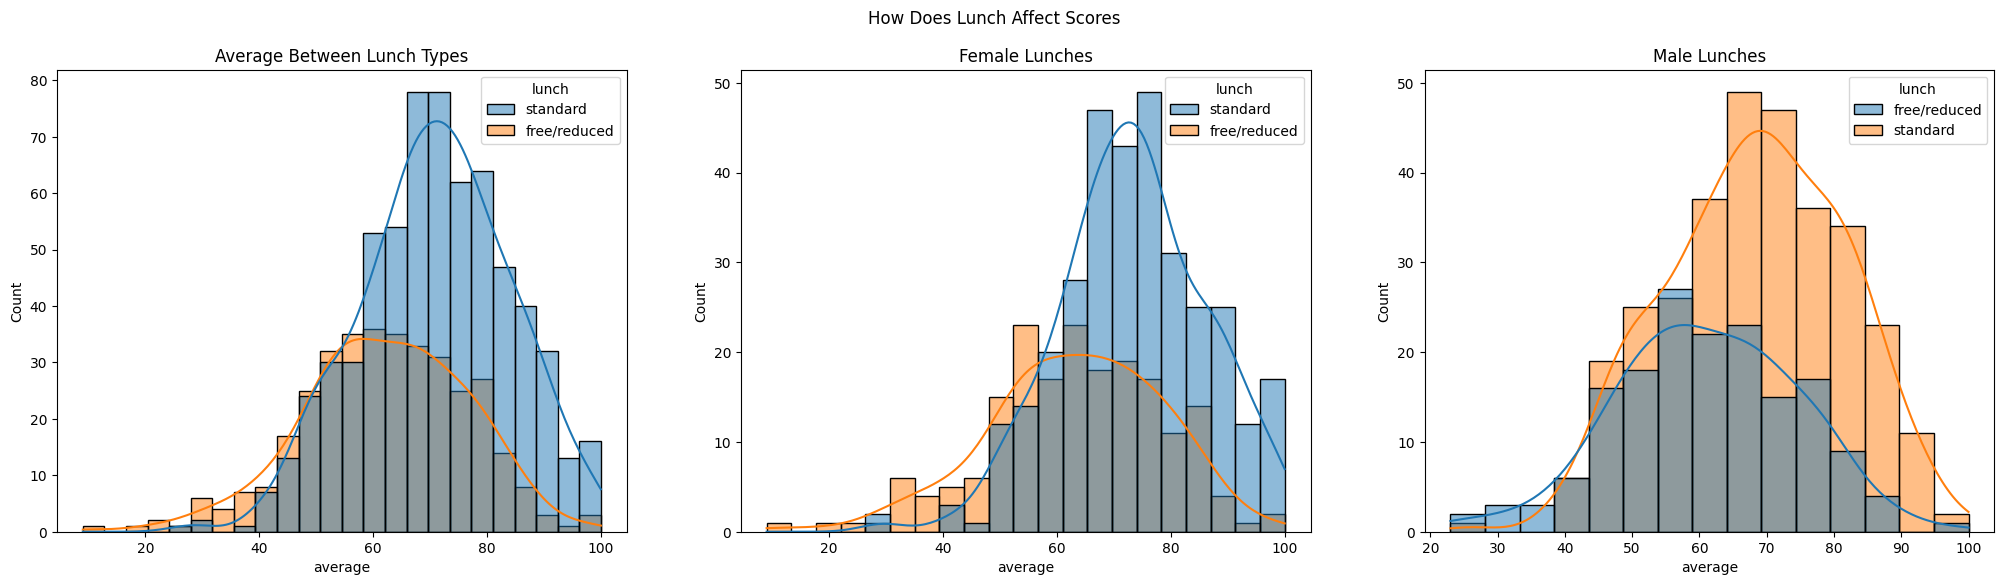

In [77]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=students,x='average',kde=True,hue='lunch')
plt.title('Average Between Lunch Types')
plt.subplot(132)
sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Female Lunches')
plt.subplot(133)
sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Male Lunches')
plt.suptitle('How Does Lunch Affect Scores')
plt.show()

Across the genders, having a standard lunch helps students perform better than the free/reduced lunches.

### Parental Level of Education

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=students,x='average',kde=True,hue='lunch')
plt.title('Average Between Lunch Types')
plt.subplot(132)
sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Female Lunches')
plt.subplot(133)
sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Male Lunches')
plt.suptitle('How Does Lunch Affect Scores')
plt.show()

### Test Preparation

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=students,x='average',kde=True,hue='lunch')
plt.title('Average Between Lunch Types')
plt.subplot(132)
sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='lunch')
plt.title('Female Lunches')
plt.subplot(133)
sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='lunch')
plt.title('Male Lunches')
plt.suptitle('How Does Lunch Affect Scores')
plt.show()

We see

## Multivariate Analysis

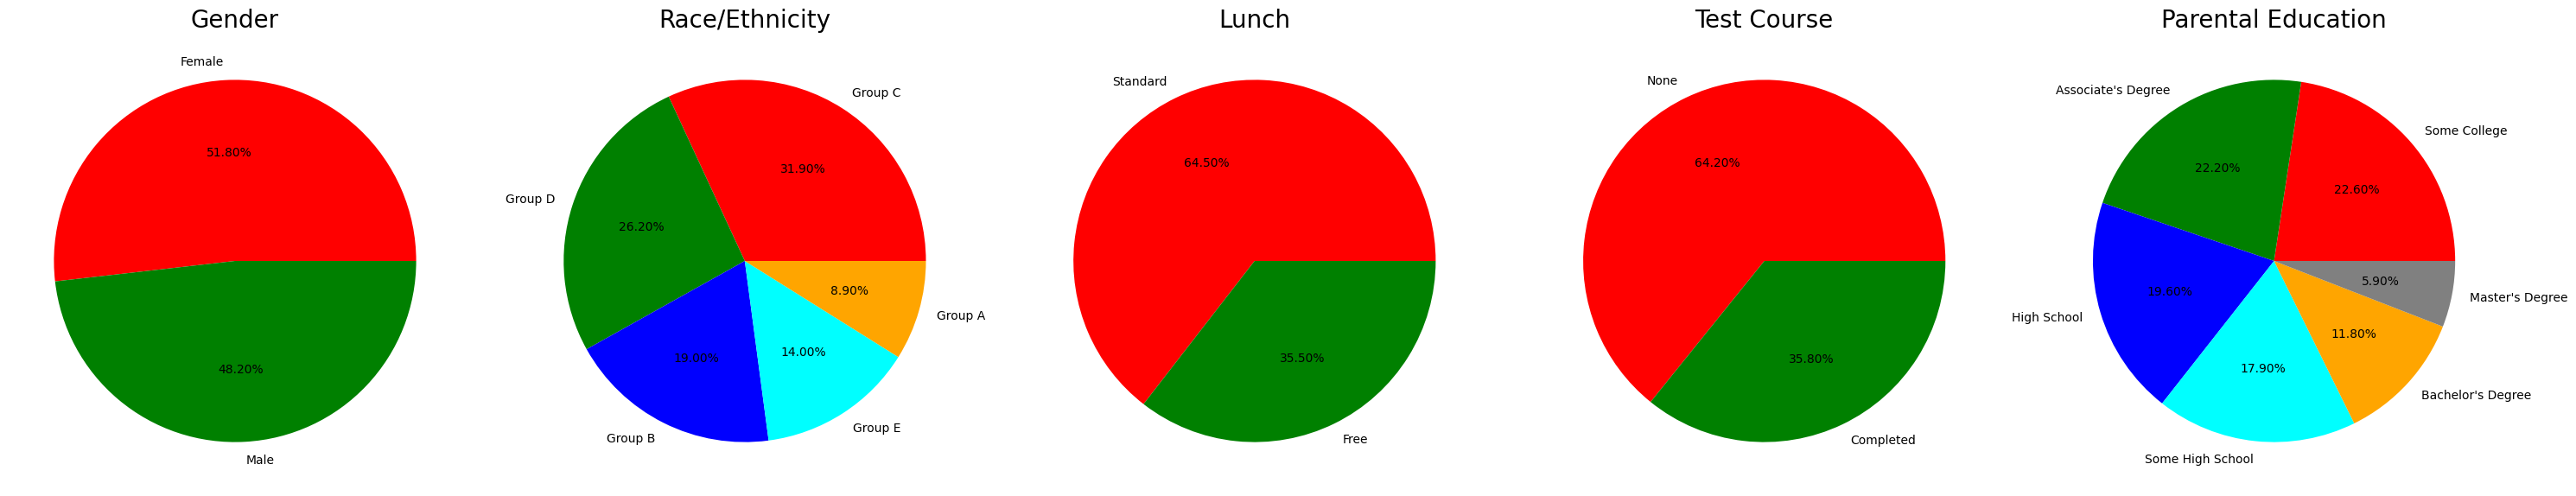

In [84]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = students['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '%1.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = students['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = students['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = students['test_prep_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = students['parental_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

- The genders are almost equal
- Group C is the largest represented race of students
- More students have a standard lunch
- Most students do not have a test preparation course
- More than half the students have parents with higher education past high school

### Univariate Analysis


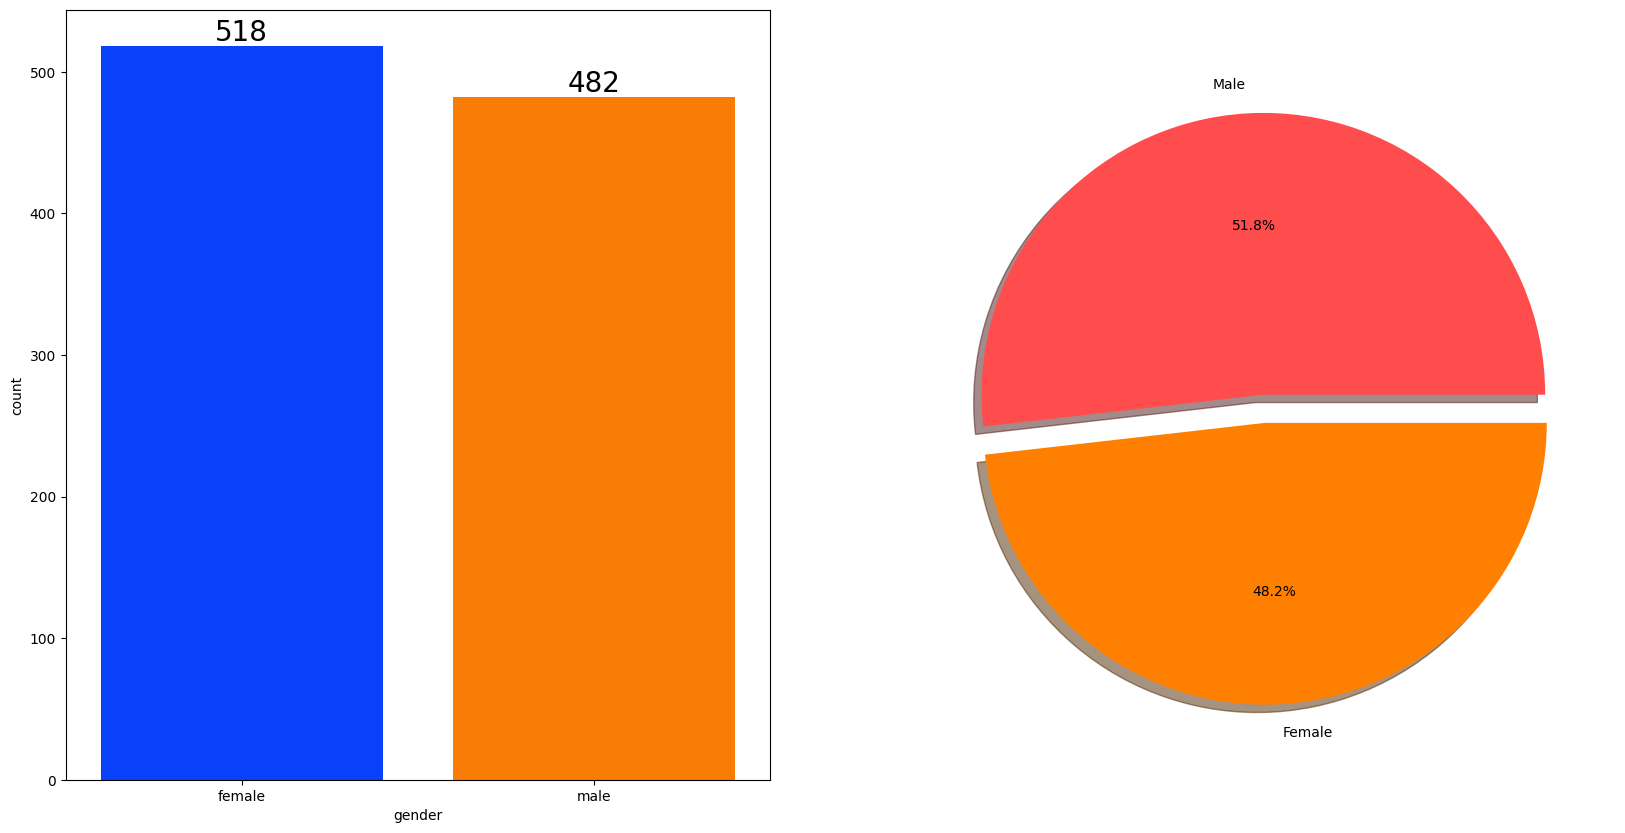

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=students['gender'],data=students,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=students['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()